In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
data=pd.read_csv('thermodynamics.csv')

In [5]:
data

,Step,Time,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
0,1,0.5,9194.67,292.503,2186.980,807.017,-2647.57,-1840.56,1.005360
1,2,1.0,9302.99,293.461,-1257.580,809.662,-2629.40,-1819.74,0.993652
2,3,1.5,9113.69,298.554,-3301.230,823.711,-2628.33,-1804.62,1.014290
3,4,2.0,9198.38,302.528,-4657.720,834.677,-2629.24,-1794.57,1.004950
4,5,2.5,9130.54,290.567,-710.977,801.676,-2591.64,-1789.97,1.012420
...,...,...,...,...,...,...,...,...,...
194,195,97.5,9192.93,297.812,1134.070,821.665,-2642.75,-1821.08,1.005550
195,196,98.0,9337.59,296.965,-1927.790,819.329,-2596.11,-1776.78,0.989970
196,197,98.5,9119.26,309.630,-1103.290,854.271,-2628.38,-1774.11,1.013670
197,198,99.0,9022.08,295.689,1359.530,815.807,-2629.19,-1813.38,1.024590


In [7]:
data.head()

,Step,Time,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
0,1,0.5,9194.67,292.503,2186.980,807.017,-2647.57,-1840.56,1.005360
1,2,1.0,9302.99,293.461,-1257.580,809.662,-2629.40,-1819.74,0.993652
2,3,1.5,9113.69,298.554,-3301.230,823.711,-2628.33,-1804.62,1.014290
3,4,2.0,9198.38,302.528,-4657.720,834.677,-2629.24,-1794.57,1.004950
4,5,2.5,9130.54,290.567,-710.977,801.676,-2591.64,-1789.97,1.012420


In [9]:
data.tail()

,Step,Time,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
194,195,97.5,9192.93,297.812,1134.07,821.665,-2642.75,-1821.08,1.00555
195,196,98.0,9337.59,296.965,-1927.79,819.329,-2596.11,-1776.78,0.98997
196,197,98.5,9119.26,309.630,-1103.29,854.271,-2628.38,-1774.11,1.01367
197,198,99.0,9022.08,295.689,1359.53,815.807,-2629.19,-1813.38,1.02459
198,199,99.5,8865.98,300.846,2497.79,830.037,-2690.37,-1860.33,1.04263


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Step         199 non-null    int64  
 1   Time         199 non-null    float64
 2   Volume       199 non-null    float64
 3   Temperature  199 non-null    float64
 4   Pressure     199 non-null    float64
 5   Kinetic      199 non-null    float64
 6   Potential    199 non-null    float64
 7   Energy       199 non-null    float64
 8   Density      199 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 14.1 KB


In [13]:
data.describe()

,Step,Time,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,100.000000,50.000000,9007.441307,298.888402,102.621241,824.634824,-2648.653166,-1824.018593,1.026478
std,57.590508,28.795254,133.275619,7.676824,1825.960539,21.180391,27.242203,32.394689,0.015152
min,1.000000,0.500000,8702.080000,275.620000,-4657.720000,760.436000,-2720.630000,-1912.660000,0.978717
25%,50.500000,25.250000,8920.410000,293.669500,-1146.185000,810.237000,-2670.345000,-1846.340000,1.014575
50%,100.000000,50.000000,9000.960000,299.139000,170.431000,825.327000,-2648.770000,-1824.730000,1.026990
75%,149.500000,74.750000,9111.105000,304.264000,1650.755000,839.465500,-2629.215000,-1800.455000,1.036270
max,199.000000,99.500000,9444.950000,322.245000,4959.470000,889.075000,-2589.970000,-1753.220000,1.062270


In [15]:
features = data[['Volume', 'Temperature', 'Pressure', 'Kinetic', 'Potential', 'Energy', 'Density']]

In [17]:
features

,Volume,Temperature,Pressure,Kinetic,Potential,Energy,Density
0,9194.67,292.503,2186.980,807.017,-2647.57,-1840.56,1.005360
1,9302.99,293.461,-1257.580,809.662,-2629.40,-1819.74,0.993652
2,9113.69,298.554,-3301.230,823.711,-2628.33,-1804.62,1.014290
3,9198.38,302.528,-4657.720,834.677,-2629.24,-1794.57,1.004950
4,9130.54,290.567,-710.977,801.676,-2591.64,-1789.97,1.012420
...,...,...,...,...,...,...,...
194,9192.93,297.812,1134.070,821.665,-2642.75,-1821.08,1.005550
195,9337.59,296.965,-1927.790,819.329,-2596.11,-1776.78,0.989970
196,9119.26,309.630,-1103.290,854.271,-2628.38,-1774.11,1.013670
197,9022.08,295.689,1359.530,815.807,-2629.19,-1813.38,1.024590


In [23]:
scaler = StandardScaler()

In [25]:
scaler

StandardScaler()

In [27]:
scaled_features = scaler.fit_transform(features)

In [29]:
scaled_features

array([[ 1.40836636, -0.83387436,  1.14439256, ...,  0.03986086,
        -0.51190878, -1.39729555],
       [ 2.22316798, -0.70876844, -0.74680243, ...,  0.70852286,
         0.1324101 , -2.1719619 ],
       [ 0.7992209 , -0.04366981, -1.86884433, ...,  0.74789921,
         0.60033044, -0.80643712],
       ...,
       [ 0.8411194 ,  1.40275321, -0.66209133, ...,  0.7460592 ,
         1.54452683, -0.84745977],
       [ 0.11011476, -0.41781227,  0.69009091, ...,  0.71625093,
         0.32923373, -0.12493188],
       [-1.06409622,  0.25564417,  1.31503912, ..., -1.53519327,
        -1.12373319,  1.06869478]])

In [35]:
agglomerative_clustering=AgglomerativeClustering(n_clusters=3, linkage='ward')

In [37]:
agglomerative_clustering

AgglomerativeClustering(n_clusters=3)

In [39]:
data['Cluster'] = agglomerative_clustering.fit_predict(scaled_features)

In [41]:
data['Cluster']

0      0
1      0
2      0
3      0
4      0
      ..
194    0
195    0
196    1
197    0
198    2
Name: Cluster, Length: 199, dtype: int64

In [43]:
linked = linkage(scaled_features, method='ward')

In [45]:
linked

array([[1.42000000e+02, 1.55000000e+02, 1.55717464e-01, 2.00000000e+00],
       [7.70000000e+01, 1.21000000e+02, 2.23891824e-01, 2.00000000e+00],
       [9.10000000e+01, 1.59000000e+02, 2.66491438e-01, 2.00000000e+00],
       [9.50000000e+01, 1.64000000e+02, 3.05868148e-01, 2.00000000e+00],
       [1.16000000e+02, 1.17000000e+02, 3.45507926e-01, 2.00000000e+00],
       [1.11000000e+02, 1.18000000e+02, 4.65555177e-01, 2.00000000e+00],
       [1.80000000e+01, 2.01000000e+02, 4.96017379e-01, 3.00000000e+00],
       [1.30000000e+02, 1.67000000e+02, 5.06163661e-01, 2.00000000e+00],
       [4.40000000e+01, 1.66000000e+02, 5.26871799e-01, 2.00000000e+00],
       [9.00000000e+00, 1.49000000e+02, 5.35712638e-01, 2.00000000e+00],
       [1.08000000e+02, 1.90000000e+02, 5.42616126e-01, 2.00000000e+00],
       [2.00000000e+01, 1.01000000e+02, 5.51811645e-01, 2.00000000e+00],
       [5.20000000e+01, 8.30000000e+01, 5.56741216e-01, 2.00000000e+00],
       [4.60000000e+01, 1.51000000e+02, 5.60444812e

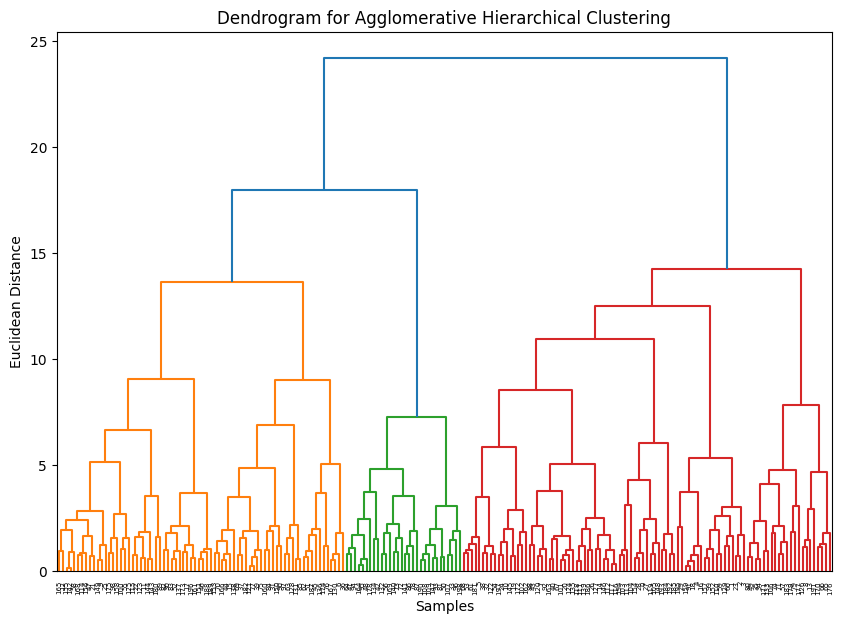

In [57]:
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

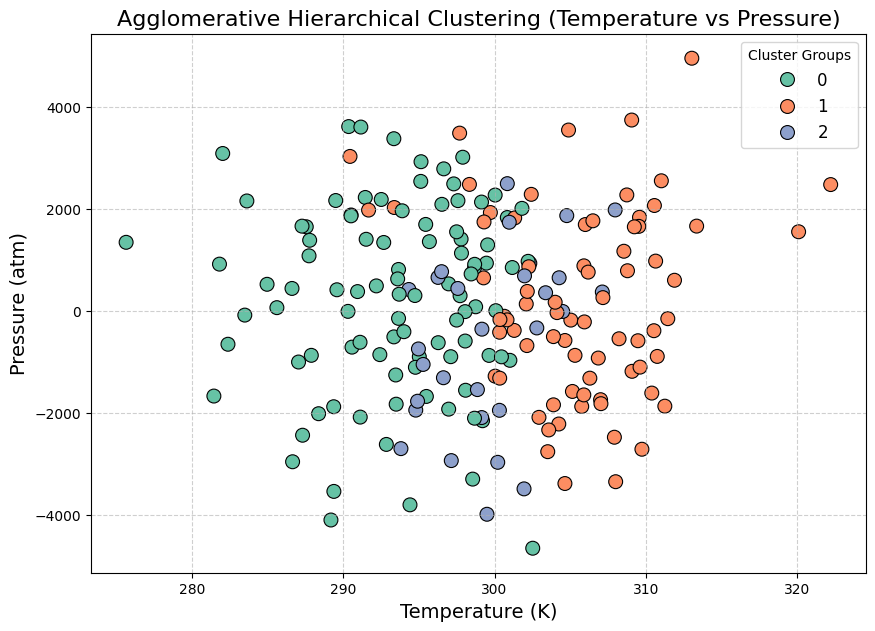

In [51]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data['Temperature'], y=data['Pressure'], hue=data['Cluster'], palette='Set2', s=100, edgecolor='black')
plt.title('Agglomerative Hierarchical Clustering (Temperature vs Pressure)', fontsize=16)
plt.xlabel('Temperature (K)', fontsize=14)
plt.ylabel('Pressure (atm)', fontsize=14)
plt.legend(title='Cluster Groups', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()